In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [47]:
df = pd.read_excel('titanic.xls')

<h2> EDA </h2> 

In [48]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [49]:
df.shape

(1309, 14)

In [50]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [52]:
df.describe()   

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [53]:
df.drop(['name','home.dest','fare'],axis=1,inplace=True)

In [54]:
df['age']= df['age'].fillna(0)
df['cabin']= df['cabin'].fillna(0)
df['embarked']= df['embarked'].fillna(0)
df['boat']= df['boat'].fillna(0)
df['body']= df['body'].fillna(0)


In [55]:
df.head(10)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
0,1,1,female,29.0000,0,0,24160,B5,S,2,0.0
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,0.0
2,1,0,female,2.0000,1,2,113781,C22 C26,S,0,0.0
3,1,0,male,30.0000,1,2,113781,C22 C26,S,0,135.0
4,1,0,female,25.0000,1,2,113781,C22 C26,S,0,0.0
5,1,1,male,48.0000,0,0,19952,E12,S,3,0.0
6,1,1,female,63.0000,1,0,13502,D7,S,10,0.0
7,1,0,male,39.0000,0,0,112050,A36,S,0,0.0
8,1,1,female,53.0000,2,0,11769,C101,S,D,0.0
9,1,0,male,71.0000,0,0,PC 17609,0,C,0,22.0


In [56]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
cabin       0
embarked    0
boat        0
body        0
dtype: int64

<h2> Visulization </h2>

<h4> Histogram </h4>

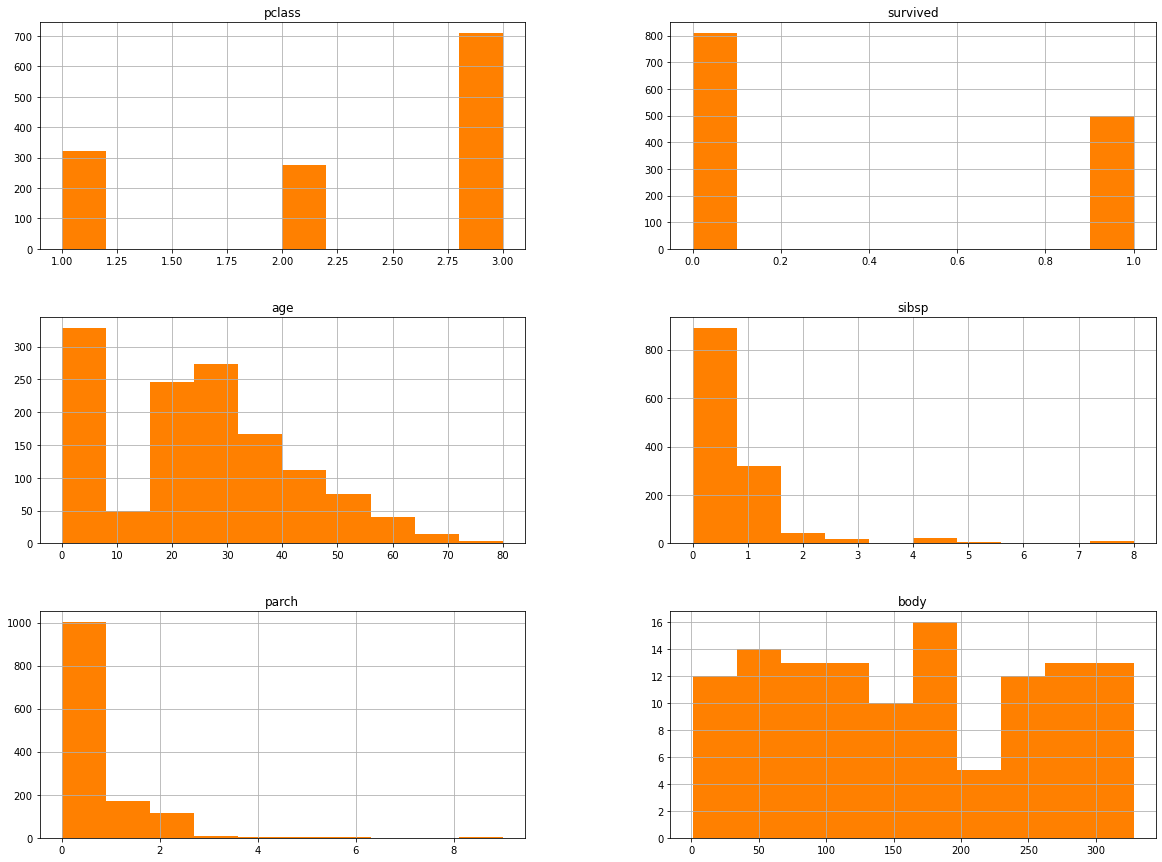

In [132]:
df.hist(figsize=(20,15),color='#ff8000')
plt.show()

<h4> Outlier </h4>

In [65]:
df_copy= df.copy()

In [66]:
df_copy.head(15)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body
0,1,1,female,29.0000,0,0,24160,B5,S,2,0.0
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,0.0
2,1,0,female,2.0000,1,2,113781,C22 C26,S,0,0.0
3,1,0,male,30.0000,1,2,113781,C22 C26,S,0,135.0
4,1,0,female,25.0000,1,2,113781,C22 C26,S,0,0.0
5,1,1,male,48.0000,0,0,19952,E12,S,3,0.0
6,1,1,female,63.0000,1,0,13502,D7,S,10,0.0
7,1,0,male,39.0000,0,0,112050,A36,S,0,0.0
8,1,1,female,53.0000,2,0,11769,C101,S,D,0.0
9,1,0,male,71.0000,0,0,PC 17609,0,C,0,22.0


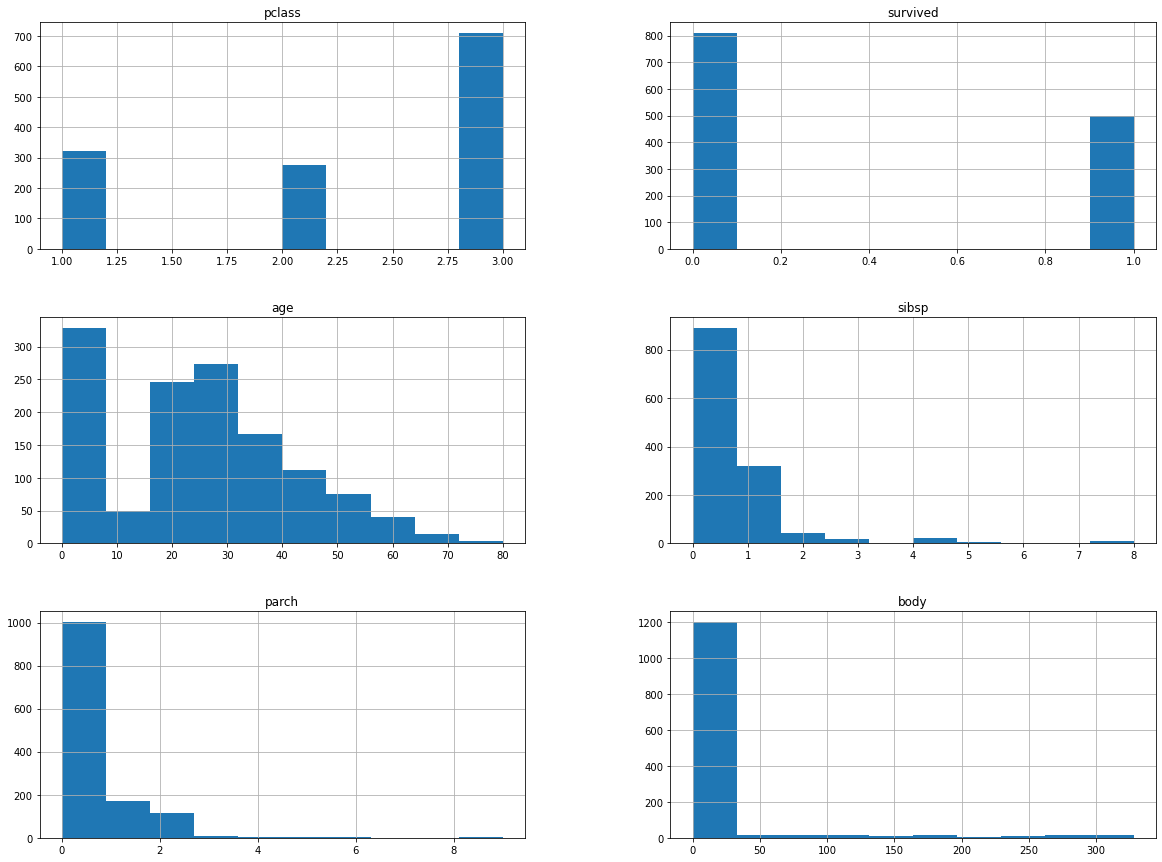

In [67]:
df_copy.hist(figsize=(20,15))
plt.show()

In [62]:
df_copy[df_copy['age' ] > 100]['age'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [68]:
df_copy.drop(df_copy[df_copy['age' ] > 100]['age'].index , inplace=True)

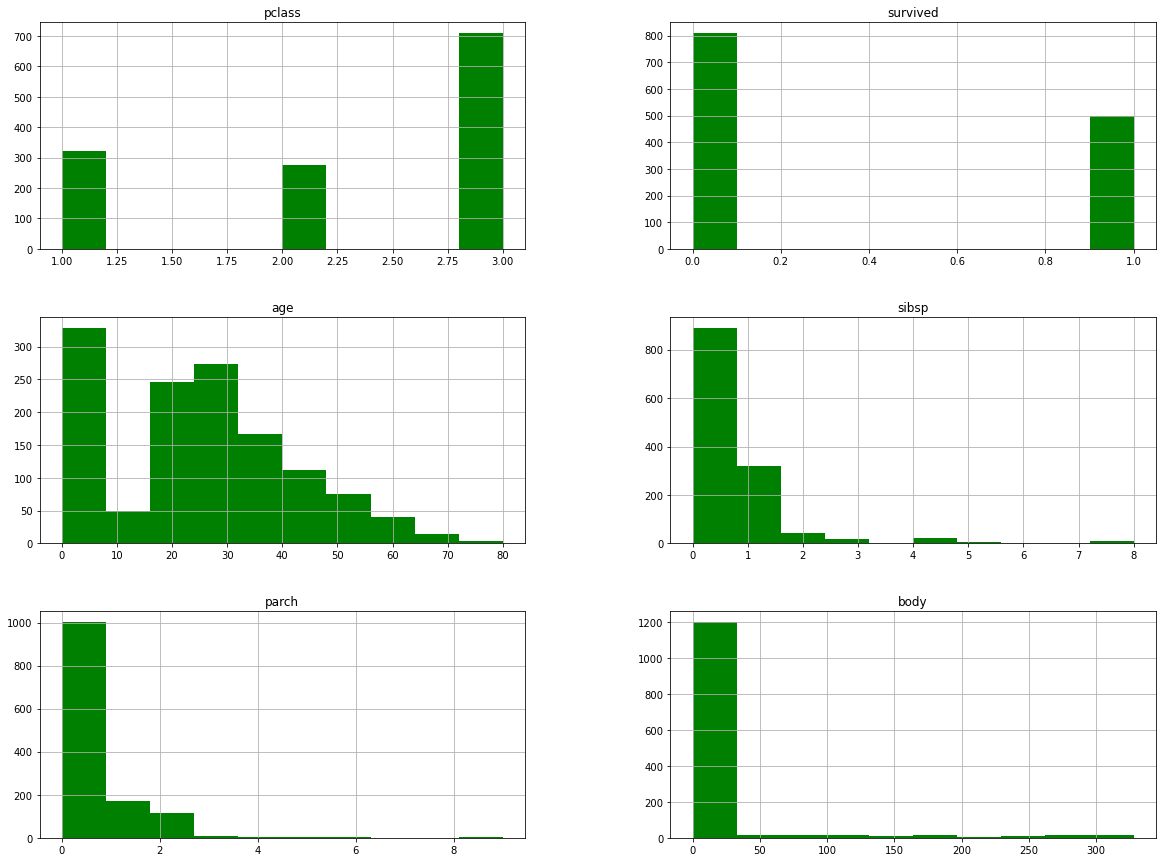

In [69]:
df_copy.hist(figsize=(20,15),color='g')
plt.show()

In [70]:
df_copy.shape

(1309, 11)

In [71]:
df['sex'].value_counts()


male      843
female    466
Name: sex, dtype: int64

In [72]:
df['pclass'].value_counts()


3    709
1    323
2    277
Name: pclass, dtype: int64

In [41]:
df['sex'].unique()


array(['female', 'male'], dtype=object)

In [100]:
gender1_df = df[ df['sex']=='male' ]
survived_male = gender1_df[ gender1_df['survived']==1 ]
survived_percentage1 = ( survived_male.shape[0] / gender1_df.shape[0] ) * 100
print ('surviving male percentage',"%.2f" % survived_percentage1, '%')

surviving male percentage 19.10 %


In [81]:
for gen in df['sex'].unique():
    print(gen)
    gender_df = df[ df['sex']==gen ]
    survived = gender_df[ gender_df['survived']==1 ]
    survived_percentage = ( survived.shape[0] / gender_df.shape[0] ) * 100
    print("Total:", gender_df.shape[0])
    print("Survivors Number :",survived.shape[0])
    print("Survivors rate :", "%.2f" % survived_percentage, '%')
    
    print("\n--------\n")
    

female
Total: 466
Survivors Number : 339
Survivors rate : 72.75 %

--------

male
Total: 843
Survivors Number : 161
Survivors rate : 19.10 %

--------



<h4> Pie Chart </h4>

In [83]:
x= np.array([ 72.75, 19.10,(100- 19.10),(100-72.75)])
labels1=['surviving women ','surviving men','drowning men','drowning women']

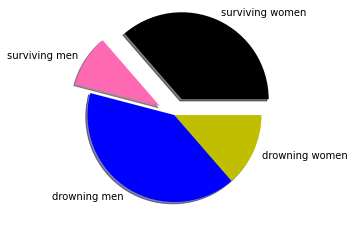

In [84]:
myexplode = [0.2, 0.2, 0, 0]
mycolors = ["black", "hotpink", "b", "y"]
plt.pie(x, labels = labels1,explode = myexplode, shadow = True, colors = mycolors)
plt.show() 


In [85]:
for x_class in df['pclass'].unique():
    print('class : ',x_class)
    
    x_df = df[ df['pclass']==x_class ]
    survived = x_df[ x_df['survived']==1 ]
    
    survived_percentage = ( survived.shape[0] / x_df.shape[0] ) * 100
    
    print("Count: ", x_df.shape[0])
    print("Servived Rate in pclass  : ", "%.2f" % survived_percentage, '%')
    
    print("\n-------------\n")
    
    

class :  1
Count:  323
Servived Rate in pclass  :  61.92 %

-------------

class :  2
Count:  277
Servived Rate in pclass  :  42.96 %

-------------

class :  3
Count:  709
Servived Rate in pclass  :  25.53 %

-------------



<h4> Bars </h4>

In [86]:
x = np.array(["class 1", "class 2", 'class 3'])
y = np.array([323, 277, 709])


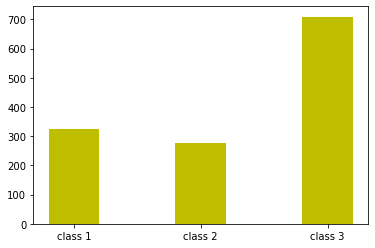

In [87]:
plt.bar(x, y, color = "y",width = 0.4)
plt.show()

In [88]:
def age_to_category( age ):
    if age < 4:
        return "baby"
    elif age < 10:
        return "child"
    elif age < 21:
        return "teen"
    elif age < 33:
        return "young adult"
    elif age < 50:
        return "adult"
    return "elder"


In [91]:
df['age_phase'] = df['age'].apply( age_to_category )

In [92]:
df.head(10)

,pclass,survived,sex,age,sibsp,parch,ticket,cabin,embarked,boat,body,age_phase
0,1,1,female,29.0000,0,0,24160,B5,S,2,0.0,young adult
1,1,1,male,0.9167,1,2,113781,C22 C26,S,11,0.0,baby
2,1,0,female,2.0000,1,2,113781,C22 C26,S,0,0.0,baby
3,1,0,male,30.0000,1,2,113781,C22 C26,S,0,135.0,young adult
4,1,0,female,25.0000,1,2,113781,C22 C26,S,0,0.0,young adult
5,1,1,male,48.0000,0,0,19952,E12,S,3,0.0,adult
6,1,1,female,63.0000,1,0,13502,D7,S,10,0.0,elder
7,1,0,male,39.0000,0,0,112050,A36,S,0,0.0,adult
8,1,1,female,53.0000,2,0,11769,C101,S,D,0.0,elder
9,1,0,male,71.0000,0,0,PC 17609,0,C,0,22.0,elder


In [93]:
for phase in df['age_phase'].unique():
    print(phase)
    
    phase_df = df[ df['age_phase']==phase ]
    survived = phase_df[ phase_df['survived'] == 1 ]
    
    survived_percentage = ( survived.shape[0] / phase_df.shape[0] ) * 100
    print("Count: ", phase_df.shape[0])
    print("Servived Rate : ", "%.2f" % survived_percentage, '%')
    
    print("\n-----------\n")


young adult
Count:  413
Servived Rate :  38.26 %

-----------

baby
Count:  304
Servived Rate :  32.57 %

-----------

adult
Count:  274
Servived Rate :  40.51 %

-----------

elder
Count:  110
Servived Rate :  40.00 %

-----------

teen
Count:  167
Servived Rate :  38.32 %

-----------

child
Count:  41
Servived Rate :  58.54 %

-----------



In [94]:
y= np.array([38.26, 32.57,40.51,40.00,38.32,58.54])
mylabels=['young adult','baby','adult','elder','teen','child'] 

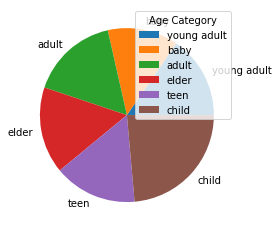

In [95]:
plt.pie(y, labels = mylabels)
plt.legend(title = "Age Category")
plt.show() 


<h3> Save Excel File in CSV format </h3>

In [120]:
df.to_csv('new_set.csv', sep='\t', encoding='utf8' )

In [123]:
new_df = pd.read_csv('new_set.csv', sep='\t' ,encoding='utf8')
